## Convolutional Neural Nets (CNN)
- from Deep Learning with Python, by Francois Chollet

- 컨브넷이 (image_height, image_width, image_channels) 크기의 입력 텐서를 사용한다는 점이 중요합니다(배치 차원은 포함하지 않습니다). 이 예제에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하도록 컨브넷을 설정해야 합니다. 이 때문에 첫 번째 층의 매개변수로 input_shape=(28, 28, 1)을 전달합니다.
- Conv2D와 MaxPooling2D 층의 출력은 (height, width, channels) 크기의 3D 텐서입니다. 높이와 넓이 차원은 네트워크가 깊어질수록 작아지는 경향이 있습니다. 채널의 수는 Conv2D 층에 전달된 첫 번째 매개변수에 의해 조절됩니다(32개 또는 64개).
- 다음 단계에서 마지막 층의 ((3, 3, 64) 크기인) 출력 텐서를 완전 연결 네트워크에 주입합니다. 이 네트워크는 이미 익숙하게 보았던 Dense 층을 쌓은 분류기입니다. 이 분류기는 1D 벡터를 처리하는데 이전 층의 출력이 3D 텐서입니다. 그래서 먼저 3D 출력을 1D 텐서로 펼쳐야 합니다. 그다음 몇 개의 Dense 층을 추가합니다.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 34s 9ms/step - loss: 0.1740 - accuracy: 0.9460
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0462 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0325 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0188 - accuracy: 0.9941


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0391 - accuracy: 0.9896


In [ ]:
test_loss, test_acc

(0.03913046419620514, 0.9896000027656555)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

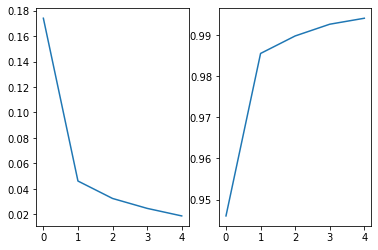

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

## Recurrent Neural Network (RNN)

- from https://github.com/gilbutITbook/006975

- SimpleRNN: 
  - SimpleRNN이 한 가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리한다는 것입니다. 즉, (timesteps, input_features) 크기가 아니라 (batch_size, timesteps, input_features) 크기의 입력을 받습니다.
  - 케라스에 있는 모든 순환 층과 동일하게 SimpleRNN은 두 가지 모드로 실행할 수 있습니다. 각 타임스텝의 출력을 모은 전체 시퀀스를 반환하거나(크기가 (batch_size, timesteps, output_features)인 3D 텐서), 입력 시퀀스에 대한 마지막 출력만 반환할 수 있습니다(크기가 (batch_size, output_features)인 2D 텐서). 이 모드는 객체를 생성할 때 return_sequences 매개변수로 선택할 수 있습니다. 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32)) # 문장 길이(단어 개수) 10000, 단어벡터 차원 32
model.add(SimpleRNN(32))
model.summary()
model.input_shape, model.output_shape

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


((None, None), (None, 32))

- embedding(in_dim, out_dim): 10000 * 32 = 320000
- simpleRNN: (32 + 32)*32 + 32 = 2080

In [3]:
# 뒤에 flatten 이나 Dense layer 에 연결하기위해서는 length 가 고정되어야 함
model = Sequential()
model.add(Embedding(10000, 32, input_length=20)) # 인풋 20개
model.add(SimpleRNN(32))
model.summary()
model.input_shape, model.output_shape

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


((None, 20), (None, 32))

In [6]:
# RNN layer의 중간 결과들을 저장
model = Sequential()
model.add(Embedding(10000, 32, input_length=20))
model.add(SimpleRNN(32, return_sequences=True)) # 중간 결과 반환
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 32)            320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 20, 32)            2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓는 것이 유용할 때가 있다. 이런 설정에서는 중간 층들이 전체 출력 시퀀스를 반환하도록 설정해야 한다:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=20))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 20, 32)            320000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 20, 32)            2080      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 20, 32)            2080      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 20, 32)            2080      
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


- input shape and output shape 확인

In [ ]:
import numpy as np
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
model.summary()
print(model.input_shape, model.output_shape)
input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)

assert output_array.shape == (32, 10, 64)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 10, 64)            64000     
Total params: 64,000
Trainable params: 64,000
Non-trainable params: 0
_________________________________________________________________
(None, 10) (None, 10, 64)


# IMDB 영화 리뷰 문제에 적용

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# max_features = 10000  # 특성으로 사용할 단어의 수(가장 빈번한 max_features 개의 단어만 사용)
# maxlen = 500  # 사용할 텍스트의 길이
max_features = 1000     # 시간이 너무 오래 걸리지 않도록
maxlen = 50
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
17473536/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 50)
input_test 크기: (25000, 50)


In [ ]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 14s 84ms/step - loss: 0.4461 - acc: 0.7930 - val_loss: 0.4746 - val_acc: 0.7648
Epoch 2/5
157/157 [==============================] - 13s 82ms/step - loss: 0.4099 - acc: 0.8156 - val_loss: 0.5044 - val_acc: 0.7482
Epoch 3/5
157/157 [==============================] - 13s 83ms/step - loss: 0.3766 - acc: 0.8363 - val_loss: 0.4899 - val_acc: 0.7752
Epoch 4/5
157/157 [==============================] - 13s 83ms/step - loss: 0.3385 - acc: 0.8564 - val_loss: 0.5221 - val_acc: 0.7480
Epoch 5/5
157/157 [==============================] - 13s 82ms/step - loss: 0.3032 - acc: 0.8780 - val_loss: 0.5550 - val_acc: 0.7436


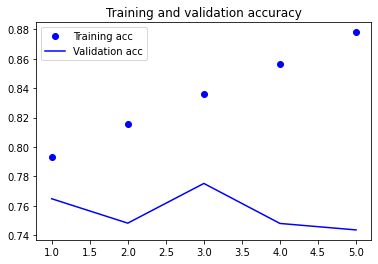

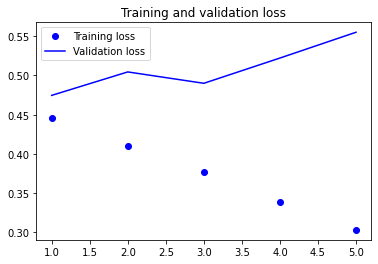

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 간단한 순환 네트워크는 생각보다 성능이 높지 않음(처음 500 개 단어, epoch 수)
- 또 다른 이유는 SimpleRNN이 텍스트와 같이 긴 시퀀스를 처리하는데 적합하지 않기 때문

# LSTM using Keras

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 7s 18ms/step - loss: 0.5692 - acc: 0.6973 - val_loss: 0.5092 - val_acc: 0.7472
Epoch 2/5
157/157 [==============================] - 2s 14ms/step - loss: 0.4569 - acc: 0.7851 - val_loss: 0.4543 - val_acc: 0.7808
Epoch 3/5
157/157 [==============================] - 2s 14ms/step - loss: 0.4333 - acc: 0.7971 - val_loss: 0.4622 - val_acc: 0.7800
Epoch 4/5
157/157 [==============================] - 2s 14ms/step - loss: 0.4223 - acc: 0.8050 - val_loss: 0.4446 - val_acc: 0.7866
Epoch 5/5
157/157 [==============================] - 2s 13ms/step - loss: 0.4145 - acc: 0.8066 - val_loss: 0.5188 - val_acc: 0.7494


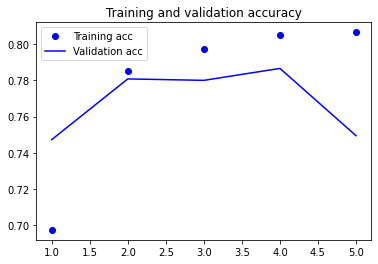

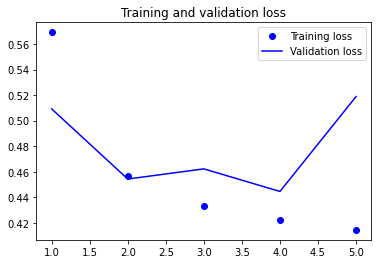

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Exercise (연습)

In [ ]:
# Keras preprocessing
# - Embedding()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
t  = Tokenizer()
text = "The earth is an awesome place to live"
t.fit_on_texts([text])


In [ ]:
test_text = "The earth is an great place to live"
sequences = t.texts_to_sequences([test_text])[0]

print("sequences : ",sequences) # great는 단어 집합(vocabulary)에 없으므로 출력되지 않는다.
print("word_index : ",t.word_index) # 단어 집합(vocabulary) 출력

sequences :  [1, 2, 3, 4, 6, 7, 8]
word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'to': 7, 'live': 8}


In [ ]:
# Keras preprocessing
# - Word Embedding(): convert words -> dense vectors
# - Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 
#   이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 
#   작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 
#   리턴합니다.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
import numpy as np

inputs1 = Input(shape=(3, 1))   # (batch_size, timesteps, input_features)
lstm1 = LSTM(1, 
             kernel_initializer='he_normal',
             bias_initializer='zeros')(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
model.summary()
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))   

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
[[0.10020867]]


In [ ]:
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, 
             kernel_initializer='he_normal',
             bias_initializer='zeros',
             return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
model.summary()
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))   # one hidden state output for each input time step

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 3, 1)              12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
[[[0.00196394]
  [0.00453043]
  [0.00697622]]]


- return sequences: return the hidden state output for each input time step.
- return state: returns the hidden state output and cell state for the last input time step.

In [ ]:
inputs1 = Input(shape=(3, 1))
lstm1 = SimpleRNN(1, 
             kernel_initializer='he_normal',
             bias_initializer='zeros',
             return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
model.summary()
print(model.output_shape)
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    [(None, 1), (None, 1)]    3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[(None, 1), (None, 1)]
[array([[-0.4260259]], dtype=float32), array([[-0.4260259]], dtype=float32)]


In [ ]:
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, 
             kernel_initializer='he_normal',
             bias_initializer='zeros',
             return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
model.summary()
print(model.output_shape)
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
lstm_20 (LSTM)               [(None, 1), (None, 1), (N 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
[(None, 1), (None, 1), (None, 1)]
[array([[-0.15843576]], dtype=float32), array([[-0.15843576]], dtype=float32), array([[-0.35585284]], dtype=float32)]


In [ ]:
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, 
             kernel_initializer='he_normal',
             bias_initializer='zeros',
             return_sequences=True,
             return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
model.summary()
print(model.output_shape)
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(model.predict(data))

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
lstm_21 (LSTM)               [(None, 3, 1), (None, 1), 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
[(None, 3, 1), (None, 1), (None, 1)]
[array([[[-0.01281191],
        [-0.03524971],
        [-0.06307889]]], dtype=float32), array([[-0.06307889]], dtype=float32), array([[-0.11892021]], dtype=float32)]
